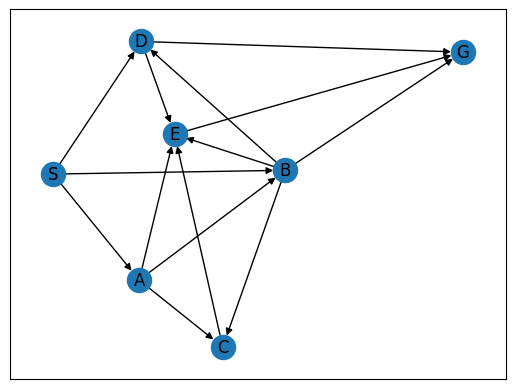

In [ ]:
import networkx as nx

g = nx.DiGraph()
edges = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
edge_list = []
for s in edges.keys():
  for c in edges[s]:
    edge_list.append((s,c))
g.add_edges_from(edge_list)
nx.draw_networkx(g)

# BFS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe.append(child)
    # print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

bfs(('S',0,-1,0),30)



[('S', 0, -1, 0)]
G B S 

True

# DFS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
    # print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

dfs(('S',0,-1,0),30)



[('S', 0, -1, 0)]
G D S 

True

# IDS

In [ ]:
last_index = 0
visited_node = []

def gen_successors(node):
    global last_index
    graph = {'S':'ABD','A':'BCE','B':'CDEG','C':'E','D':'EG','E':'G'}
    node_id = node[1]
    level = node[3]
    ret = []
    for c in graph[node[0]]:
        ret += [(c,last_index+1,node[1],node[3]+1)]
        last_index += 1
    return ret

def is_goal(node):
    return node[0] == 'G'

def insert_all(node,fringe):
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
    print(fringe)

def show_result(g):
    global visited_node
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0],end=' ')
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index
    global visited_node
    last_index = 0
    fringe = [start_node]
    print(fringe)
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        if is_goal(front):
            show_result(front)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(100):
    print('Limit at level '+str(i))
    if dfs(('S',0,-1,0),i):
        break


Limit at level 0
[('S', 0, -1, 0)]
Not Found
Limit at level 1
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
Not Found
Limit at level 2
[('S', 0, -1, 0)]
[('D', 3, 0, 1), ('B', 2, 0, 1), ('A', 1, 0, 1)]
[('G', 5, 3, 2), ('E', 4, 3, 2), ('B', 2, 0, 1), ('A', 1, 0, 1)]
G D S 

# IDS for 8-Puzzle

HW หาจำนวน Node ที่ถูก remove จาก front ของ fringe ของวิธี BFS เทียบกับ IDS ของปัญหา 8 Puzzle เซลล์ด้านล่างนี้เป็นเซลล์ของ IDS ให้แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove และถูก insert เข้าไปใน fringe

In [ ]:
last_index = 0
cnt_insert = 0
cnt_remove = 0

def gen_successors(node):
    global last_index,cnt_insert,cnt_remove
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret

def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    global cnt_insert
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
        cnt_insert += 1
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index,cnt_insert,cnt_remove
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        cnt_remove += 1
        if is_goal(front):
            show_result(front,visited_node)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(14):
    print("Limit Search at level "+str(i+1))
    cnt_insert +=1
    if dfs(('6123456078',0,-1,0),i):
        break
print("insert",cnt_insert)
print("remove",cnt_remove)






Limit Search at level 1
Not Found
Limit Search at level 2
Not Found
Limit Search at level 3
123
456
780

123
456
708

123
456
078

insert 13
remove 12


# Hint

In [ ]:
data=[1,2,3,4,5,6,7]
data.pop(-1)
data

[1, 2, 3, 4, 5, 6]

In [ ]:
data.insert(0,'a')
data.insert(-1,'b')
data.append('c')
data

['a', 1, 2, 3, 4, 5, 'b', 6, 'c']

In [ ]:
data[:-1]

['a', 1, 2, 3, 4, 5, 'b', 6]

# BFS 8 Puzzle

HW แก้โปรแกรมเพื่อหาจำนวน Node ที่ถูก remove จาก fringe และจำนวน Node ที่ถูกใส่เข้าไปใน fringe

In [ ]:
last_index = 0
cnt_insert = 0
cnt_remove = 0

def gen_successors(node):
    global last_index,cnt_insert,cnt_remove
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret

def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    global cnt_insert
    children = gen_successors(node)
    for child in children:
        fringe.append(child)
        cnt_insert+=1
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def bfs(start_node):
    global last_index,cnt_insert,cnt_remove
    last_index = 0
    cnt_insert+=1
    fringe = [start_node]
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        cnt_remove += 1
        if is_goal(front):
            show_result(front,visited_node)
            return True
        insert_all(front,fringe)

bfs(('6123456078',0,-1,0))
print("insert",cnt_insert)
print("remove",cnt_remove)



123
456
780

123
456
708

123
456
078

insert 11
remove 5


# IDS for 8-Puzzle

In [1]:
last_index = 0
cnt_insert = 0
cnt_remove = 0

def gen_successors(node):
    global last_index,cnt_insert,cnt_remove
    node_id = node[1]
    level = node[3]
    ret = []
    state = node[0]
    loc = int(state[0])
    puzzle = state[1:]
    if loc % 3 != 0:
        new_state = str(loc-1) + puzzle[:loc-1] + puzzle[loc] + puzzle[loc-1] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('L'+new_state)
    if (loc+1) % 3 != 0:
        new_state = str(loc+1) + puzzle[:loc] + puzzle[loc+1] + puzzle[loc] + puzzle[loc+2:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('R'+new_state)
    if loc >= 3:
        new_state = str(loc-3) + puzzle[:loc-3] + puzzle[loc] + puzzle[loc-2:loc] + puzzle[loc-3] + puzzle[loc+1:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('U'+new_state)
    if loc <= 5:
        new_state = str(loc+3) + puzzle[:loc] + puzzle[loc+3] + puzzle[loc+1:loc+3] + puzzle[loc] + puzzle[loc+4:]
        ret += [(new_state,last_index+1,node[1],node[3]+1)]
        last_index += 1
        # print('D'+new_state)
    return ret

def is_goal(node):
    return node[0] == '8123456780'

def insert_all(node,fringe):
    global cnt_insert
    children = gen_successors(node)
    for child in children:
        fringe[0:0] = [child]
        cnt_insert += 1
    # print(fringe)

def show_result(g,visited_node):
    current_node = g
    parent_index = current_node[1]
    while True:
        print(current_node[0][1:4])
        print(current_node[0][4:7])
        print(current_node[0][7:])
        print()
        parent_index = current_node[2]
        if parent_index == -1:
            break
        current_node = visited_node[parent_index]

def dfs(start_node,limited_level):
    global last_index,cnt_insert,cnt_remove
    last_index = 0
    fringe = [start_node]
    visited_node = {}
    while True:
        if len(fringe) == 0:
            print('Not Found')
            break
        front = fringe[0]
        visited_node[front[1]] = front
        fringe = fringe[1:]
        cnt_remove += 1
        if is_goal(front):
            show_result(front,visited_node)
            return True
        if front[3] == limited_level:
            continue
        insert_all(front,fringe)

for i in range(14):
    print("Limit Search at level "+str(i+1))
    cnt_insert +=1
    if dfs(('6123456078',0,-1,0),i):
        break
print("insert",cnt_insert)
print("remove",cnt_remove)



Limit Search at level 1
Not Found
Limit Search at level 2
Not Found
Limit Search at level 3
123
456
780

123
456
708

123
456
078

insert 13
remove 12
